 # 데이터

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_Gen = ImageDataGenerator (
    rescale = 1./255, 
    horizontal_flip = True,         # 수평선을 기준으로 반전
    vertical_flip = True,           # 수직선을 기준으로 반전
    width_shift_range = 0.1,        # 10% 만큼 가로 이동
    height_shift_range = 0.1,       # 10% 만큼 세로 이동
    rotation_range = 5,             # 회전
    zoom_range = 0.7,               # 확대
    shear_range = 0.7,              # 엇갈림
    fill_mode = 'nearest'           # 축 이동을 했을 때 비는 부분을 가까운 값으로 채운다.
)

test_data_Gen = ImageDataGenerator (
    rescale = 1./255                # 테스트 데이터는 리스케일링만 한다.: 평가에 쓰이는 테스트 데이터는 증폭시키지 않은 원 데이터 사용
)

xy_train = train_data_Gen.flow_from_directory (
    'C:/study/keras/keras_data/brain/train',
    target_size=(200,200),
    batch_size=10,                  # 10개씩 자르므로 16번 돈다.
    # class_mode='binary',
    class_mode='categorical',       # one-hot
    color_mode='grayscale',
    shuffle=True
)

# ad(alzheimer disease) = 0, normal = 1  
# x = (160, 150, 150, 1), y = (160,) → 흑백 image 
# 160장 중에 ad, normal 각 80장씩
# np.unique = 0, 1

xy_test = train_data_Gen.flow_from_directory (
    'C:/study/keras/keras_data/brain/test',
    target_size=(200,200),
    batch_size=10,                  # 10개씩 자르므로 16번 돈다.
    class_mode='binary',
    color_mode='grayscale',
    shuffle=True
)

# print(xy_train, '\n', xy_test)    # <keras.preprocessing.image.DirectoryIterator object at 0x000002862718CAC0>
# print(xy_train[0])                # x data와 y data 개수, y data 개수 = batch_size 개수 만큼
# print(xy_train[0][0])
# print(xy_train[0][1])
print(xy_train[0][0].shape)         # x (10 = batch_size)
print(xy_train[0][1].shape)         # y
print(xy_train[1][0].shape)         # x
print(xy_train[1][1].shape)         # y
# xy_train[15][1]까지 있음

# batch_size를 전체 데이터보다 최대한 크게 끔 지정하면 전체 데이터의 개수를 알 수 있다.
 
print(type(xy_train))        
print(type(xy_train[0]))             # 튜플은 변경 불가 
print(type(xy_train[0][0]))
print(type(xy_train[0][1]))





Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
(10, 200, 200, 1)
(10, 2)
(10, 200, 200, 1)
(10, 2)
<class 'keras.preprocessing.image.DirectoryIterator'>
<class 'tuple'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# 변환 후 이미지

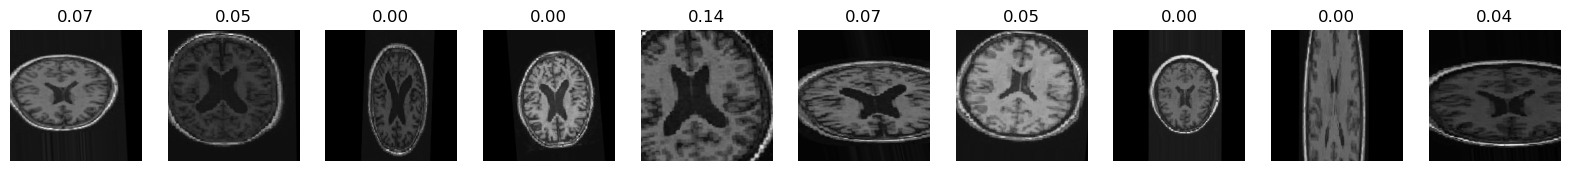

In [2]:
import matplotlib.pyplot as plt

img = xy_train[0] # img = xy_train.__getitem__(0)
plt.figure(figsize=(20, 5))
for i, img in enumerate(img[0]):
    plt.subplot(1, 10, i+1)
    plt.title('%.2f' % img[1][i])
    plt.axis('off') # 축 표시 X
    plt.imshow(img.squeeze(), 'gray') #차원 = 1인 차원을 제거